<a href="https://colab.research.google.com/github/NRedits/YBI-Project/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Social Network Ads**

With the help of Social_Network_Ads dataset we want to predict whether the Customer Purchased or not using Age, EstimatedSalary as the dependent data and Purchased as the independent data.

Logistic Regression

# Importing Libraries

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/mlt/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Data Preprocessing

In [ ]:
#Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
#Checking for null values
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
x=pd.DataFrame(df,columns=['Age'])
y=pd.DataFrame(df,columns=['Purchased'])

# Define Target Variable (y) and Feature Variables (X)

In [ ]:
x.head()

,Age
0,19
1,35
2,26
3,27
4,19


In [ ]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.head()

,Age
22,48
333,40
231,39
312,38
171,34


In [ ]:
x_test.head()

,Age
297,43
132,30
361,53
216,49
58,22


In [ ]:
y_train.head()

,Purchased
22,1
333,0
231,0
312,0
171,0


In [ ]:
y_test.head()

,Purchased
297,1
132,0
361,1
216,0
58,0


# Model

In [ ]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
x_pred = reg.predict(x_test)
y_pred = reg.predict(x_test)

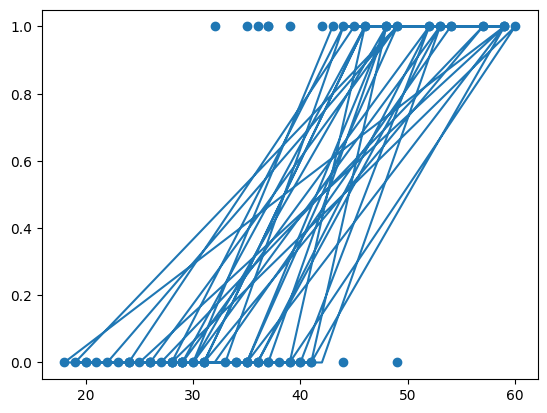

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)
plt.show()

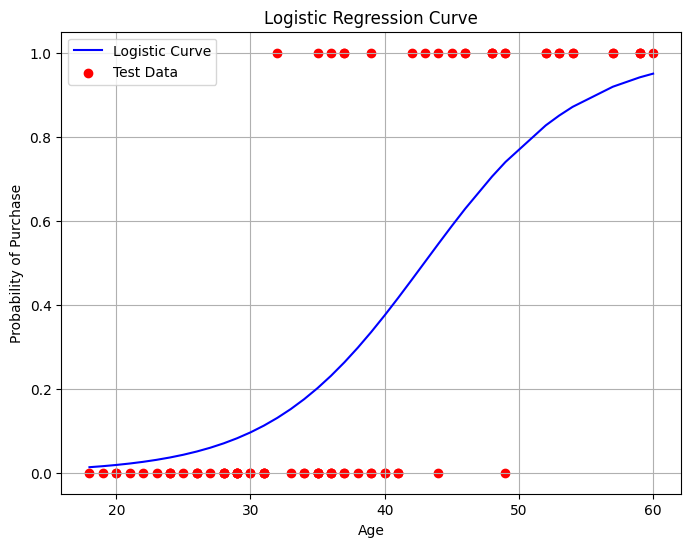

In [ ]:
#Logistic curve graph

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Predict probabilities for the test data
y_pred_proba = reg.predict_proba(x_test)[:, 1]

# Sort the test data and predicted probabilities for plotting
sorted_indices = np.argsort(x_test['Age'])
x_test_sorted = x_test.iloc[sorted_indices]
y_pred_proba_sorted = y_pred_proba[sorted_indices]

plt.figure(figsize=(8, 6))
plt.plot(x_test_sorted, y_pred_proba_sorted, color='blue', label='Logistic Curve')
plt.scatter(x_test, y_test, color='red', label='Test Data')
plt.xlabel('Age')
plt.ylabel('Probability of Purchase')
plt.title('Logistic Regression Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

In [ ]:
from sklearn import metrics
print("Accuracy Score:",metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.8875


In [ ]:
conf_mat=metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix:")
conf_mat

Confusion matrix:


array([[49,  2],
       [ 7, 22]])

In [ ]:
Coefficient=pd.DataFrame(reg.coef_,columns=x.columns)
Coefficient

,Age
0,0.172998


In [ ]:
#Classification Report
from sklearn.metrics import classification_report as cr
print("Classification Report:")
print(cr(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        51
           1       0.92      0.76      0.83        29

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



In [ ]:
#Precision
print("Precision:",metrics.precision_score(y_test,y_pred))

Precision: 0.9166666666666666


In [ ]:
#Recall Sensitivity
print("Recall Sensitivity:",metrics.recall_score(y_test,y_pred))

Recall Sensitivity: 0.7586206896551724


In [ ]:
#F1 score
f1_score=metrics.f1_score(y_test,y_pred)
print("F1 Score:",f1_score)

F1 Score: 0.830188679245283


In [ ]:
Accuracy=metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",Accuracy)

Accuracy: 0.8875


In [ ]:
support=metrics.precision_recall_fscore_support(y_test,y_pred)
print("Support:",support)

Support: (array([0.875     , 0.91666667]), array([0.96078431, 0.75862069]), array([0.91588785, 0.83018868]), array([51, 29]))


# Prediction

In [ ]:
a=reg.predict([[46]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
a

array([1])